# 2.  Machine Learning for Regression Code-along

## Car Price Prediction Model Project

https://github.com/DataTalksClub/machine-learning-zoomcamp

https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/02-regression

In [1]:
import pandas as pd
import numpy as np

In [129]:
np.set_printoptions(threshold = 10000000, suppress=True, precision=3)

## 2.1 Data Preparation

In [4]:
# Download data file directly from https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/chapter-02-car-price/data.csv.  
# When loading the file with pandas, you get an error if you download the data using wget.  

In [5]:
# For reference--original nb instructions are to download via wget.  
# data = https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/chapter-02-car-price/data.csv
# !wget $data

In [500]:
df = pd.read_csv('data.csv')

In [501]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

Clean column headers to make consistent:

In [502]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [503]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

Next, let's clean up the data points to be more consistent, starting with strings.

In [504]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [505]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [506]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

## 2.2 Exploratory Data Analysis

In [507]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [508]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

Distribution of price

In [509]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

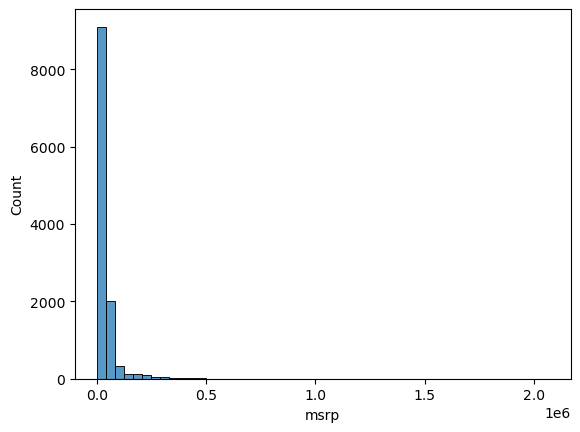

In [510]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

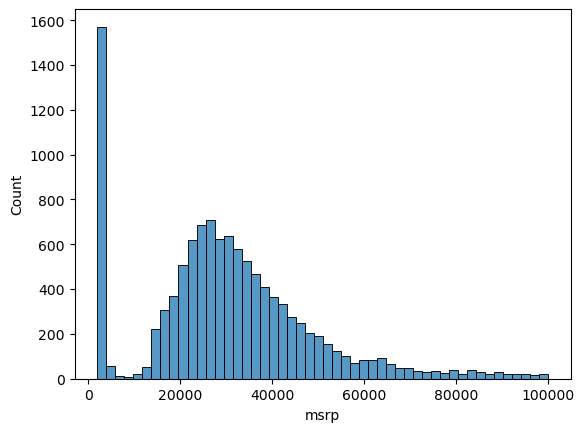

In [511]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [512]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

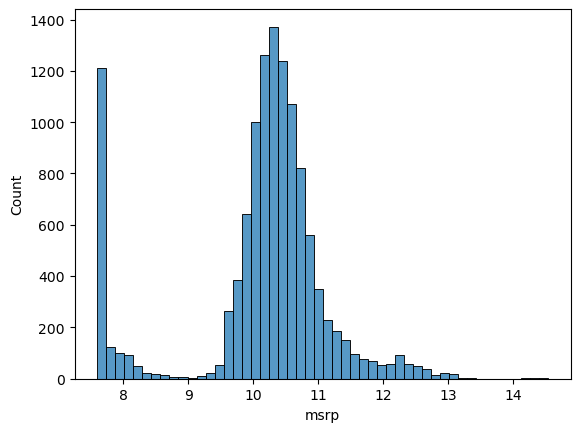

In [513]:
sns.histplot(price_logs, bins=50)

Missing values

In [514]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.3 Setting up the validation framework

Need to split dataset into train, test, and validation datasets in the proportions 60% / 20% / 20%.  Alexei walks us through the process step-by-step, rather than using a library, so we can understand the process.

In [515]:
# figure out length of dataset and figure out how to divide it up equally 
int(len(df) * 0.2)  # get integer value

2382

In [516]:
n = len(df)

n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = int(len(df) * 0.6)

In [517]:
n, n_val + n_test + n_train

(11914, 11912)

These values are not the same due to rounding; need to correct this before proceeding.


In [518]:
n_train = n - n_val - n_test

In [519]:
n_val, n_test, n_train

(2382, 2382, 7150)

Can select records by index using df.iloc.  But before we do this, need to shuffle and randomize the data points.

In [520]:
idx = np.arange(n)

In [521]:
# To make reproducible (give same results as in the course), set random seed
np.random.seed(2)
np.random.shuffle(idx)

In [525]:
# idx

In [526]:
# idx[n_train:]

In [527]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [528]:
df_train.head()

make    model  year          engine_fuel_type  engine_hp  \
2735    chevrolet   cobalt  2008          regular_unleaded      148.0   
6720       toyota   matrix  2012          regular_unleaded      132.0   
5878       subaru  impreza  2016          regular_unleaded      148.0   
11190  volkswagen  vanagon  1991          regular_unleaded       90.0   
4554         ford    f-150  2017  flex-fuel_(unleaded/e85)      385.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
2735                4.0            manual  front_wheel_drive              2.0   
6720                4.0         automatic  front_wheel_drive              4.0   
5878                4.0         automatic    all_wheel_drive              4.0   
11190               4.0            manual   rear_wheel_drive              3.0   
4554                8.0         automatic   four_wheel_drive              4.0   

      market_category vehicle_size      vehicle_style  highway_mpg  city_mpg  \
2735              NaN      compact              coupe           33        24   
6720        hatchback      compact      4dr_hatchback           32        25   
5878        hatchback      compact      4dr_hatchback           37        28   
11190             NaN        large  passenger_minivan           18        16   
4554        flex_fuel        large    crew_cab_pickup           21        15   

       popularity   msrp  
2735         1385  14410  
6720         2031  19685  
5878          640  19795  
11190         873   2000  
4554         5657  56260

In [529]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [530]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [531]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [532]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [533]:
len(y_train)

7150

## 2.4 Linear Regression

The purpose of linear regression in this instance is to predicit the price of a car based on the car's characteristics.  This can be shown with the notation g(X) ~= y, where g is the model (linear regression in this case), X is a matrix of features, and y is the target variable (price, or msrp).  

Each row of X is denoted as xi (i is subscripted).  Each element of xi is further denoted by a number; thus, x = {xi1, xi2, xi3, ... xin}.  We want to find the function g(xi) ~= yi, where our prediction is as close to the actual value as possible.

So the equation with xi is g(xi) = w0 + w1 * xi1 + w2 * xi2 + w3 * xi3, where w0 is the bias term and w1, w2, and w3 are weights.

Let's take a look at a single row in the training df (training matrix "X")

In [534]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [535]:
# Let's take 3 features:  engine_hp, city_mpg, popularity
# i = 10, so xi is the 10th item in the df.

xi = [453.0, 11, 86]
w0 = 7.17  
w = [0.01, 0.04, 0.002]  

In [536]:
def linear_regression(xi):
    n = len(xi)

    pred = w0 

    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [537]:
linear_regression(xi)

12.312

This amount doesn't make much sense, but we have to make a correction:  we had taken the logarithm of (y+1).  To undo this, we need to take the exponent of this.

In [538]:
int(np.expm1(12.312))

222347

## 2.6 Linear Regression - Vector Form

When we look at the linear regression equation, where each term of xi is multiplied by each weight w (w1, w2, w3, ... wn), we can see that the linear regression equation is basically a dot product of the matrix X and weights vector w.  This can be written as:  g(xi) = w0 + (xi(T) * wj).

In [539]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [540]:
def linear_regression(xi):
    return w0 + dot(xi, w)

We can shorten this even more.  We can imagine that there is one extra feature, xi0, in our car, that will go along with the bias term w0, and that this feature is always 1.  Now, our vector w  = [w0, w1, w2, ...] and xi = [xi0, xi1, xi2, ...], and since xi0 = 1, we get xi = [1, xi1, xi2, xi3, ....].  When we do dot product between them, W(Transpose)xi = xi(Transpose)w = w0 + w1 + ...

In [541]:
w_new = [w0] + w

In [542]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [543]:
# do the same with xi

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [544]:
linear_regression(xi)

12.312

In [545]:
# From above

w_new = [w0] + w
w0 = 7.17  
w = [0.01, 0.04, 0.002]  

In [546]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453.0, 11, 86]

In [547]:
X = [x1, x2, x10]  # X becomes a list of lists
X = np.array(X).astype(int)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [548]:
def linear_regression(X):
    return X.dot(w_new)

In [549]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.6 Training a linear regression model

Remember that g(X) = Xw.  Ideally, g(X) = y, but often this is not possible.  To find the closest solution, we need to solve this system for w.  Let's say that the matrix X is invertable, which is denoted as X superscript -1.  If this inverse exists, X^(-1) * X * w = X^(-1) * y.  X^(-1) * X cancels, so w = X^(-1) * y.  This is how you would solve this system if inverse of X exists.  

X is usually a rectangular matrix (lots of rows, fewer columns), not a square matrix, so the inverse does not exist.  However, we can try to find an approximate solution by multiplying both sides of Xw = y by X(Transpose), or X(T) * X * w = X(T) * y.  X(T) * X is also known as the Gram Matrix.  For this matrix, the inverse exists because it is always a square matrix (n+1 by n+1).  So ((X(T)*X)^(-1) * (X(T) * X)) = 1.   Now the equation is w = ((X(T) * X) * X(T)) * y.

In [550]:
X = [
    [148, 24, 1385], 
    [132, 25, 2031], 
    [453, 11, 86], 
    [158, 24, 185], 
    [172, 25, 201], 
    [413, 11, 86], 
    [38, 54, 185], 
    [142, 25, 431], 
    [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [551]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [552]:
X = np.column_stack([ones, X])

In [553]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [554]:
XTX = X.T.dot(X)

In [555]:
XTX_inv = np.linalg.inv(XTX)

In [556]:
w_full = XTX_inv.dot(X.T).dot(y)

In [557]:
w0 = w_full[0].round(2)
w = w_full[1:]

In [558]:
w0, w

(np.float64(25844.75), array([ -16.089, -199.473,   -1.228]))

In [559]:
np.get_printoptions()

{'edgeitems': 3,
 'threshold': 10000000,
 'floatmode': 'maxprec',
 'precision': 3,
 'suppress': True,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False,
 'override_repr': None}

In [560]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    # np.set_printoptions(threshold = 100000000, suppress=True, precision=3)

    return w_full[0], w_full[1:]

In [561]:
# Rerun X above the ones line to get original X to test this function

train_linear_regression(X, y)

(np.float64(2.0460143454602068e+20),
 array([1.265e+20, 8.710e+01, 2.597e+02, 0.000e+00]))

## 2.7 Car price baseline model

In [562]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

Let's build a model using 5 features

In [563]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [564]:
df_train[base].head()

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0      148.0               4.0           33        24        1385
1      132.0               4.0           32        25        2031
2      148.0               4.0           37        28         640
3       90.0               4.0           18        16         873
4      385.0               8.0           21        15        5657

In [565]:
X_train = df_train[base].values

In [566]:
X_train = df_train[base].fillna(0).values

In [567]:
w0, w = train_linear_regression(X_train, y_train)

In [568]:
# w0 + X_train.dot(w)

In [569]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

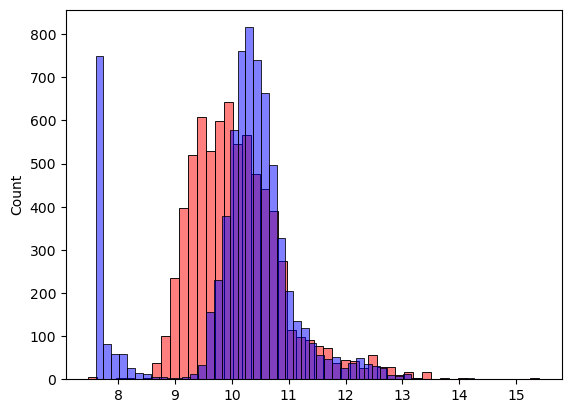

In [570]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

## 2.8 RMSE (Root Mean Squared Error)

RMSE quantifies how far off our predictions were from actual amounts.  For each xi, we find the difference between xi and yi and square it.  Then we take the average of all of these differences.  We sum the square of the differences, take the average of this quantity, then take the square root.

In [571]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse).round(8)

In [572]:
rmse(y_train, y_pred)

np.float64(0.75541926)

## 2.9 Validating the model

In [573]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [574]:
# X_train = prepare_X(df_train)

In [575]:
# w0, w = train_linear_regression(X_train, y_train)

In [576]:
# X_val = prepare_X(df_val)

In [577]:
# X_val

In [578]:
# y_pred = w0 + X_val.dot(w)

In [579]:
# y_pred

In [580]:
# y_val

Putting it all together...

In [581]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616531)

In [582]:
rmse(y_val, y_pred)

np.float64(0.7616531)

## 2.10 Simple Feature Engineering

We found that 'year' is one of the most important features determining the price of the car.  But instead of using the variable as the year, we can compute the age of the car and use that number.  First, we need to find out when this data was collected.

In [583]:
df_train.year.max()

2017

We take 2017 as the year for determining age.

In [584]:
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [486]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = df.year.max() - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [487]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.51720555)

<Axes: ylabel='Count'>

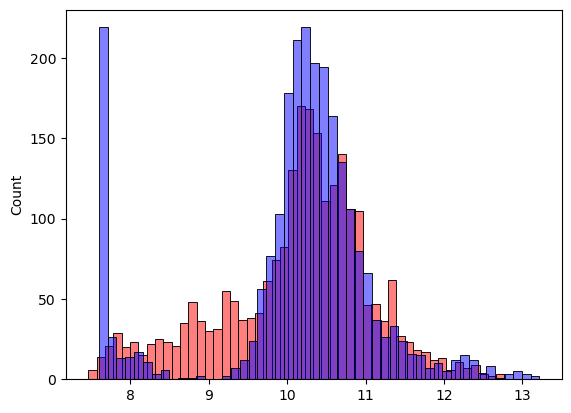

In [488]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

We can see our model improved, because RMSE dropped from 0.76 to 0.51.

## 2.11 Categorical Variables

Let's look at our columns to see which variables are categorical.  Note that sometimes, a variable may have a dtype as float, even though in reality, it's a categorical variable.  One example is number_of_doors.

In [489]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [490]:
# write a loop assigning value to each type

# for v in [2, 3, 4]:
#     df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [588]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [589]:
prepare_X(df_train)

array([[ 148.,    4.,   33.,   24., 1385.,    9.,    1.,    0.,    0.],
       [ 132.,    4.,   32.,   25., 2031.,    5.,    0.,    0.,    1.],
       [ 148.,    4.,   37.,   28.,  640.,    1.,    0.,    0.,    1.],
       [  90.,    4.,   18.,   16.,  873.,   26.,    0.,    1.,    0.],
       [ 385.,    8.,   21.,   15., 5657.,    0.,    0.,    0.,    1.],
       [ 170.,    5.,   29.,   22.,  873.,    9.,    0.,    0.,    1.],
       [ 500.,    8.,   24.,   14.,  520.,    4.,    1.,    0.,    0.],
       [ 315.,    6.,   32.,   21., 3916.,    2.,    1.,    0.,    0.],
       [ 543.,   12.,   16.,   10.,   67.,    5.,    0.,    0.,    1.],
       [ 202.,    6.,   18.,   13., 5657.,   13.,    1.,    0.,    0.],
       [ 453.,   12.,   19.,   11.,   86.,    2.,    1.,    0.,    0.],
       [ 182.,    4.,   29.,   20., 1385.,    2.,    0.,    0.,    1.],
       [ 162.,    4.,   27.,   20.,  436.,    6.,    1.,    0.,    0.],
       [ 553.,    8.,   23.,   16., 2774.,    2.,    1.,    0., 

In [590]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.51579956)

<Axes: ylabel='Count'>

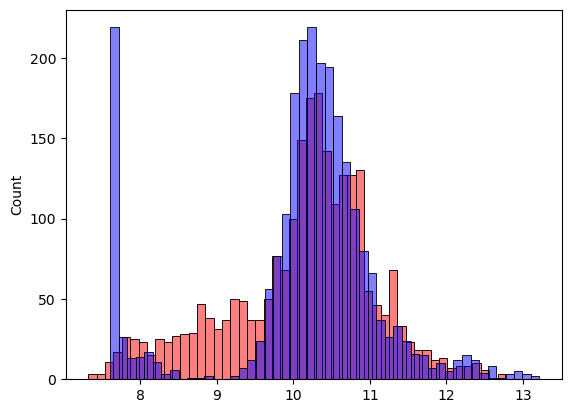

In [591]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

So the improvement was very small:  0.51579956 vs. 0.51720555.  This tells us that the num_doors_%s feature is not very useful.  

On the other hand, the car make and model are likely to be much more important.

In [592]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [593]:
# Can turn this into a list for our features

makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [594]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for make in makes: 
        df['make_%s' % make] = (df.make == make).astype('int')
        features.append('make_%s' % make)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [595]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.50760388)

Including the most popular makes improved the model only slightly, but it made a bigger difference than the number of doors feature.

In [596]:
# Looking at the other categorical variables

df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [597]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [598]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [599]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [600]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [601]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(289.02631731)

In [587]:
int(w0)

77180189280927872

Unfortunately, our results are now much, much larger.  The problem lies with the inverse of the Gram Matrix...sometimes the inverse of the Gram Matrix doesn't exist.  This usually happens when our matrix X have columns that have duplicate values.  When you then compute the Gram Matrix and then try to take the inverse, you can get an error.  

Here, we did not get an error when we tried to take the inverse; this is usually due to the fact that the data may be a bit noisy, due to very small variations in the values that are duplicates in reality.  So while the inverse shouldn't exist, the system tries to find the inverse--with the result of some very large numbers.

To solve this problem, we turn to regularization.

## 2.12 Regularization

To address the problem of duplicates in X, we can add a small number to the values in the diagonal of the matrix. For example, if the diagonal values are 1.0, we can add 0.001 to each of these values.  Regularization in this context means "controlling", as in we are controlling the weights so that they don't grow too big simply as a result of matrix manipulations.  

In [641]:
# Let's try a small example

XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [642]:
np.linalg.inv(XTX)

array([[      -0.333,        0.333,        0.333],
       [       0.333, -5000000.08 ,  4999999.914],
       [       0.333,  4999999.914, -5000000.08 ]])

In [643]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [653]:
XTX = XTX + 0.01 * np.eye(3)  # try different values of the small number (e.g. 0.01 to 0.1 or 1) to see how the weights change

In [654]:
np.linalg.inv(XTX)

array([[-2.348,  1.5  ,  1.5  ],
       [ 1.5  , -0.356, -1.241],
       [ 1.5  , -1.241, -0.356]])

In [655]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    # np.set_printoptions(threshold = 100000000, suppress=True, precision=3)

    return w_full[0], w_full[1:]

In [657]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.45652199)

This is a considerable improvement over the previous result of 0.5152056.  By adding a small number to the diagonal, we were able to control our weights to regularize the model.  The value 'r' is a parameter that allows us to tune the model.  But we need to find the best value of 'r'.  That's the topic of the next section.

## 2.13 Tuning the Model

In [658]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 7.718018928092787e+16 289.02631731
1e-05 8.99289661515472 0.45651701
0.0001 6.308647498878888 0.45651707
0.001 6.285563277652236 0.45651751
0.01 6.276606255832291 0.45652199
0.1 6.191208700099936 0.45656928
1 5.634896669063172 0.45722043
10 4.2839801089807805 0.47014569


Let's go with 0.001.

In [659]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.45651751)

## 2.14 Using the Model

In [663]:
df_full_train = pd.concat([df_train, df_val])

In [665]:
df_full_train = df_full_train.reset_index(drop=True)

In [667]:
X_full_train = prepare_X(df_full_train)

In [668]:
X_full_train

array([[ 148.,    4.,   33.,   24., 1385.,    9.,    1.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.],
       [ 132.,    4.,   32.,   25., 2031.,    5.,    0.,    0.,    1.,
           0.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.],
       [ 148.,    4.,   37.,   28.,  640.,    1.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.],
       [  90.,  

In [670]:
y_full_train = np.concatenate([y_train, y_val])

In [671]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [674]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.45177493)

Our model is not too different from what we have seen previously.  This is good because it shows that our model generalizes well.  

So now, let's see how well the model does predicting the price of the car.

In [676]:
# let's take any car from our test df:

car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

Let's imagine that this car is something a customer has queried our website to find out the price.  

First, to put it into our model, we need to convert this into a dataframe.

In [677]:
df_small = pd.DataFrame([car])
df_small

make   model  year  engine_fuel_type  engine_hp  engine_cylinders  \
0  toyota  sienna  2015  regular_unleaded      266.0               6.0   

  transmission_type      driven_wheels  number_of_doors  market_category  \
0         automatic  front_wheel_drive              4.0              NaN   

  vehicle_size      vehicle_style  highway_mpg  city_mpg  popularity  
0        large  passenger_minivan           25        18        2031

In [679]:
X_small = prepare_X(df_small)

In [687]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.65647008824464)

In [690]:
int(np.expm1(y_pred))

42465

In [691]:
int(np.expm1(y_test[20]))

35000